In [1]:
import os
import sys

# 引入本地模块
# 获得父目录路径
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

# 一般步骤

1. 生成随机私钥（记得这个私钥存下来）

In [2]:
from common.inscribe import generate_random_private_key, set_network

set_network('testnet')

priv = generate_random_private_key()
print(priv)


5277011b3ccac06f9cf4cf86be5a48b81029c44ca566c2e8eb0c4e67731355fa


In [10]:
priv = "9dea05734abdaca25257dc766193498921eda4d9f0e57e4e4aed29d0360018e2"

2. 生成铭刻地址

In [12]:
from common.inscribe import get_bitmap_inscription_address
from bitcoinutils.keys import PrivateKey
from bitcoinutils.keys import PrivateKey

privkey_tr_script = PrivateKey.from_bytes(bytes.fromhex(priv))
pubkey_tr_script = privkey_tr_script.get_public_key()

# print(priv)
address = get_bitmap_inscription_address(priv, 2540329)
# print(address)

From Taproot script address tb1pydr69mx0mzuy4yuhax8f9u7vytzj0lctw3wtekz4dwckc993tp2sz0g3jm


3. 向铭刻地址转账
   
https://mempool.space/testnet/tx/06f2b7e9e9556b827d4dd3a515010d9f066b8f1d9eacc2a8af9493a47cd3e8b3

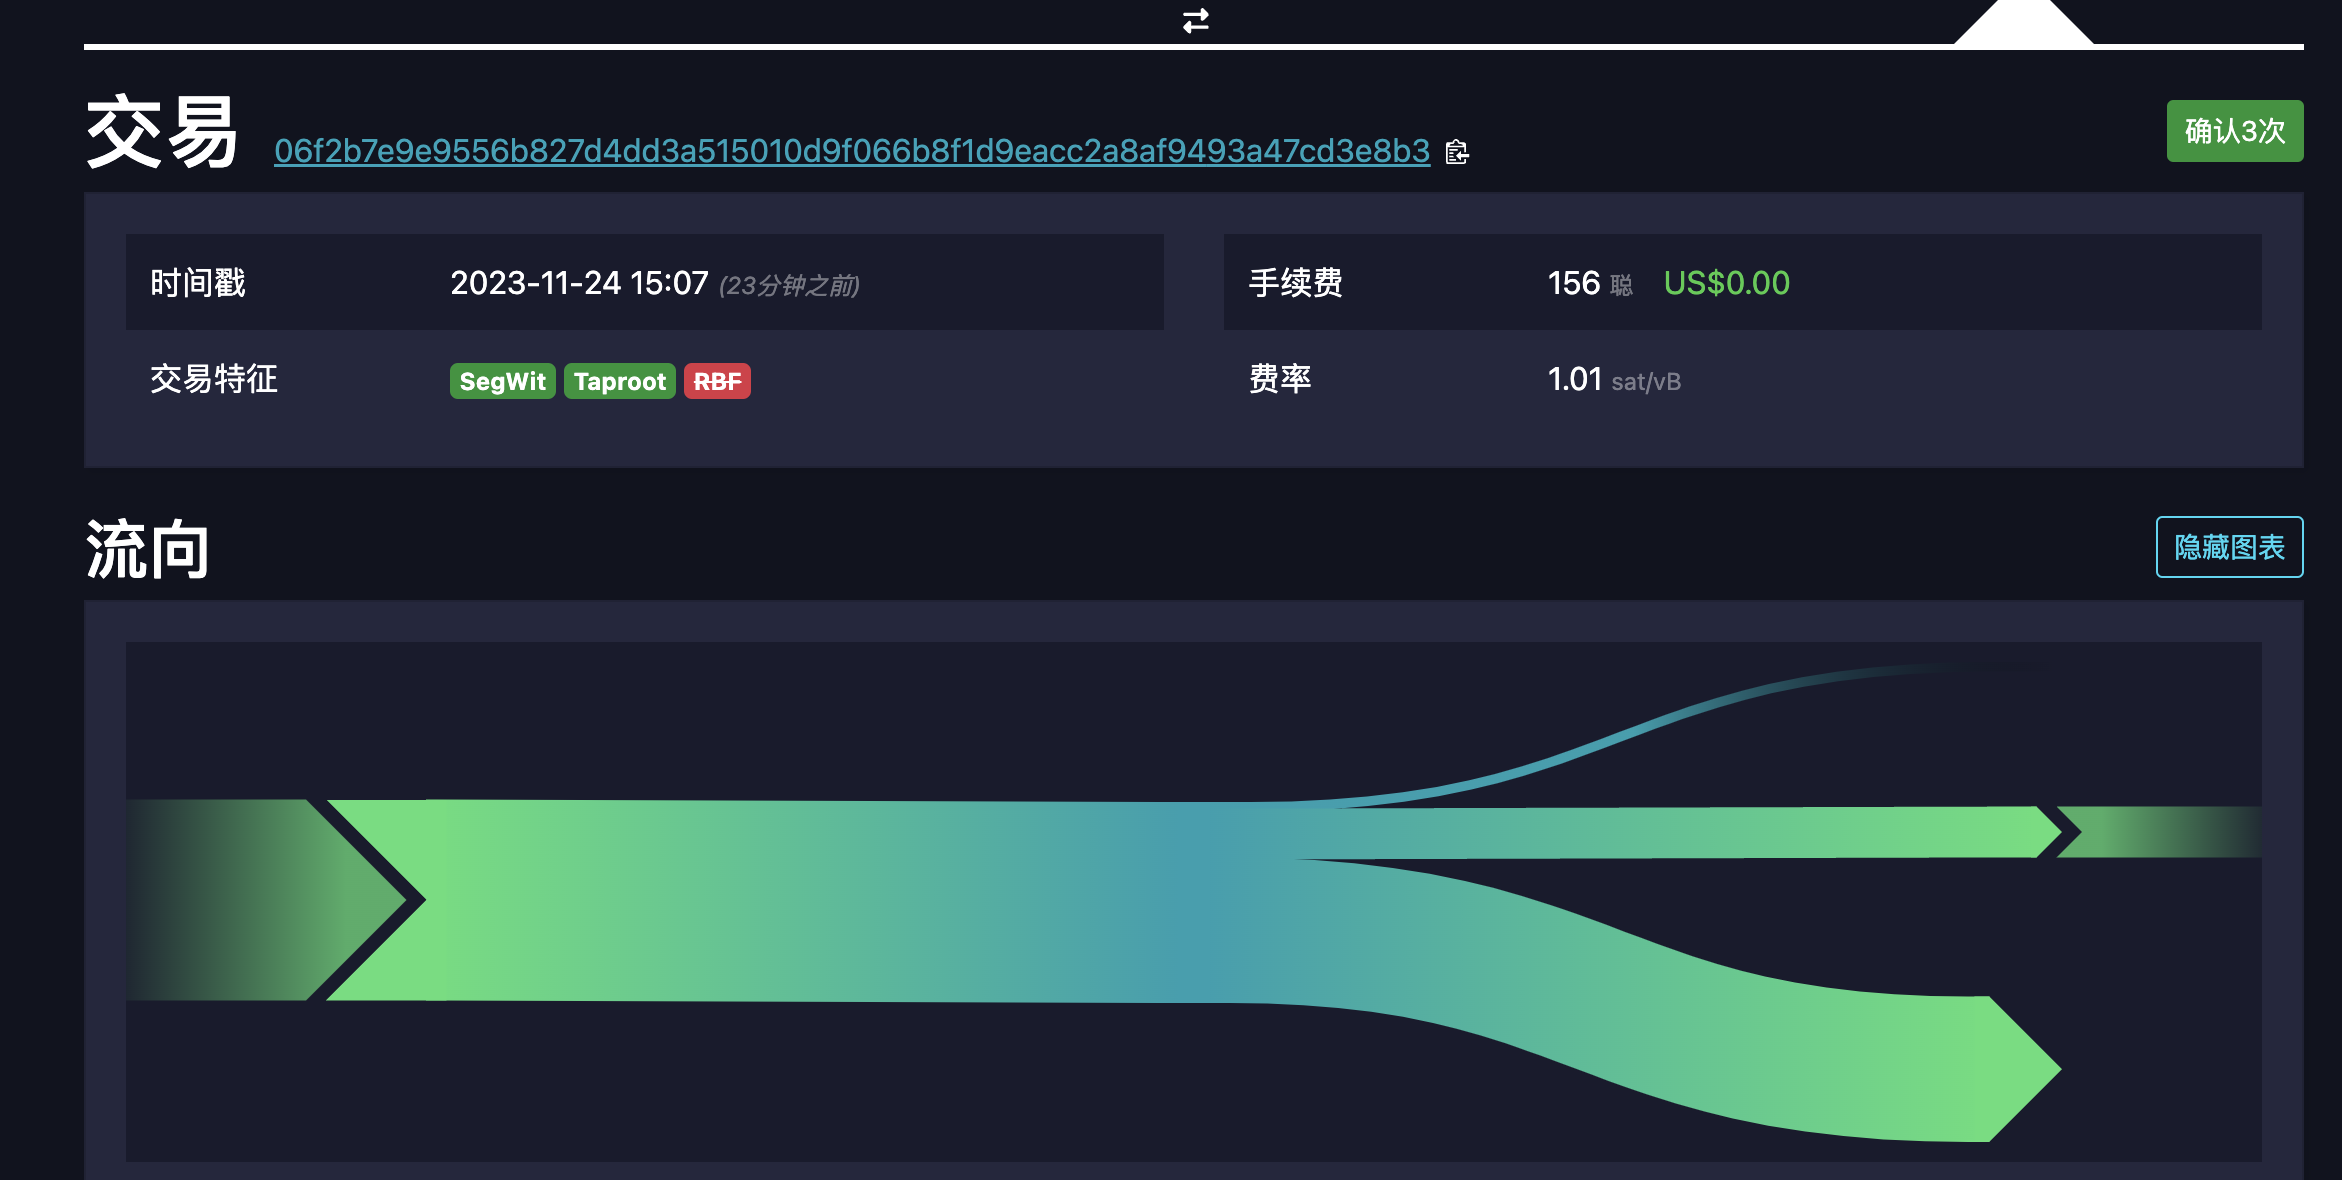

4. 铭刻铭文

In [7]:
from common.inscribe import inscribe_after_tx

[tx_hex, vsize ] = inscribe_after_tx(
  "05be063d54e438d7db48469244dc718e1cbe679778efa9c89b409d40c7fa5941",
  0,
  1000,
  priv,
  2540329,
  'tb1pfywwjgdmskq4gjc55mehzt8u6a29mjslwl5avdphfyvs0grtgwrs4c768e',
)

print(tx_hex)
print(vsize)

From Taproot script address tb1pydr69mx0mzuy4yuhax8f9u7vytzj0lctw3wtekz4dwckc993tp2sz0g3jm

Raw transaction:
020000000001014159fac7409d409bc8a9ef789767be1c8e71dc44924648dbd738e4543d06be050000000000ffffffff012202000000000000225120491ce921bb8581544b14a6f3712cfcd7545dca1f77e9d63437491907a06b438700000000

txid: 48624b0f7d184f97f03b5d1d7c6a67fbc8d74a2eb44b58473c36b5150b24a7f6

txwid: 4221e3e020c822d45bfe7ff737f92605db4b61489f9ec8edafda2f280d0022a2

Raw signed transaction:
020000000001014159fac7409d409bc8a9ef789767be1c8e71dc44924648dbd738e4543d06be050000000000ffffffff012202000000000000225120491ce921bb8581544b14a6f3712cfcd7545dca1f77e9d63437491907a06b4387034090934abe139a32b1116006de11b11159a9de9053ee7ce1ac2ef93df3ee957be51610f7a256334cfe697af0a9709423fed4f9753f84d52f9b6adf6e89b20bcdc25420e045a566e14de1a430515cb77910e6a7474d7608fd4f3def4afb5d9eab4111b6ac0063036f7264010118746578742f706c61696e3b636861727365743d7574662d38000e323534303332392e6269746d61706821c0e045a566e14de1a430515cb77910e6a7474d76

In [9]:
from client.blockchain_client import broadcast_tx

result = broadcast_tx("020000000001014159fac7409d409bc8a9ef789767be1c8e71dc44924648dbd738e4543d06be050000000000ffffffff012202000000000000225120491ce921bb8581544b14a6f3712cfcd7545dca1f77e9d63437491907a06b4387034090934abe139a32b1116006de11b11159a9de9053ee7ce1ac2ef93df3ee957be51610f7a256334cfe697af0a9709423fed4f9753f84d52f9b6adf6e89b20bcdc25420e045a566e14de1a430515cb77910e6a7474d7608fd4f3def4afb5d9eab4111b6ac0063036f7264010118746578742f706c61696e3b636861727365743d7574662d38000e323534303332392e6269746d61706821c0e045a566e14de1a430515cb77910e6a7474d7608fd4f3def4afb5d9eab4111b600000000")
print(result.status_code)
print(result.text)


response: <Response [400]>
400
sendrawtransaction RPC error: {"code":-26,"message":"non-mandatory-script-verify-flag (Witness program hash mismatch)"}


In [4]:
result.status_code

200

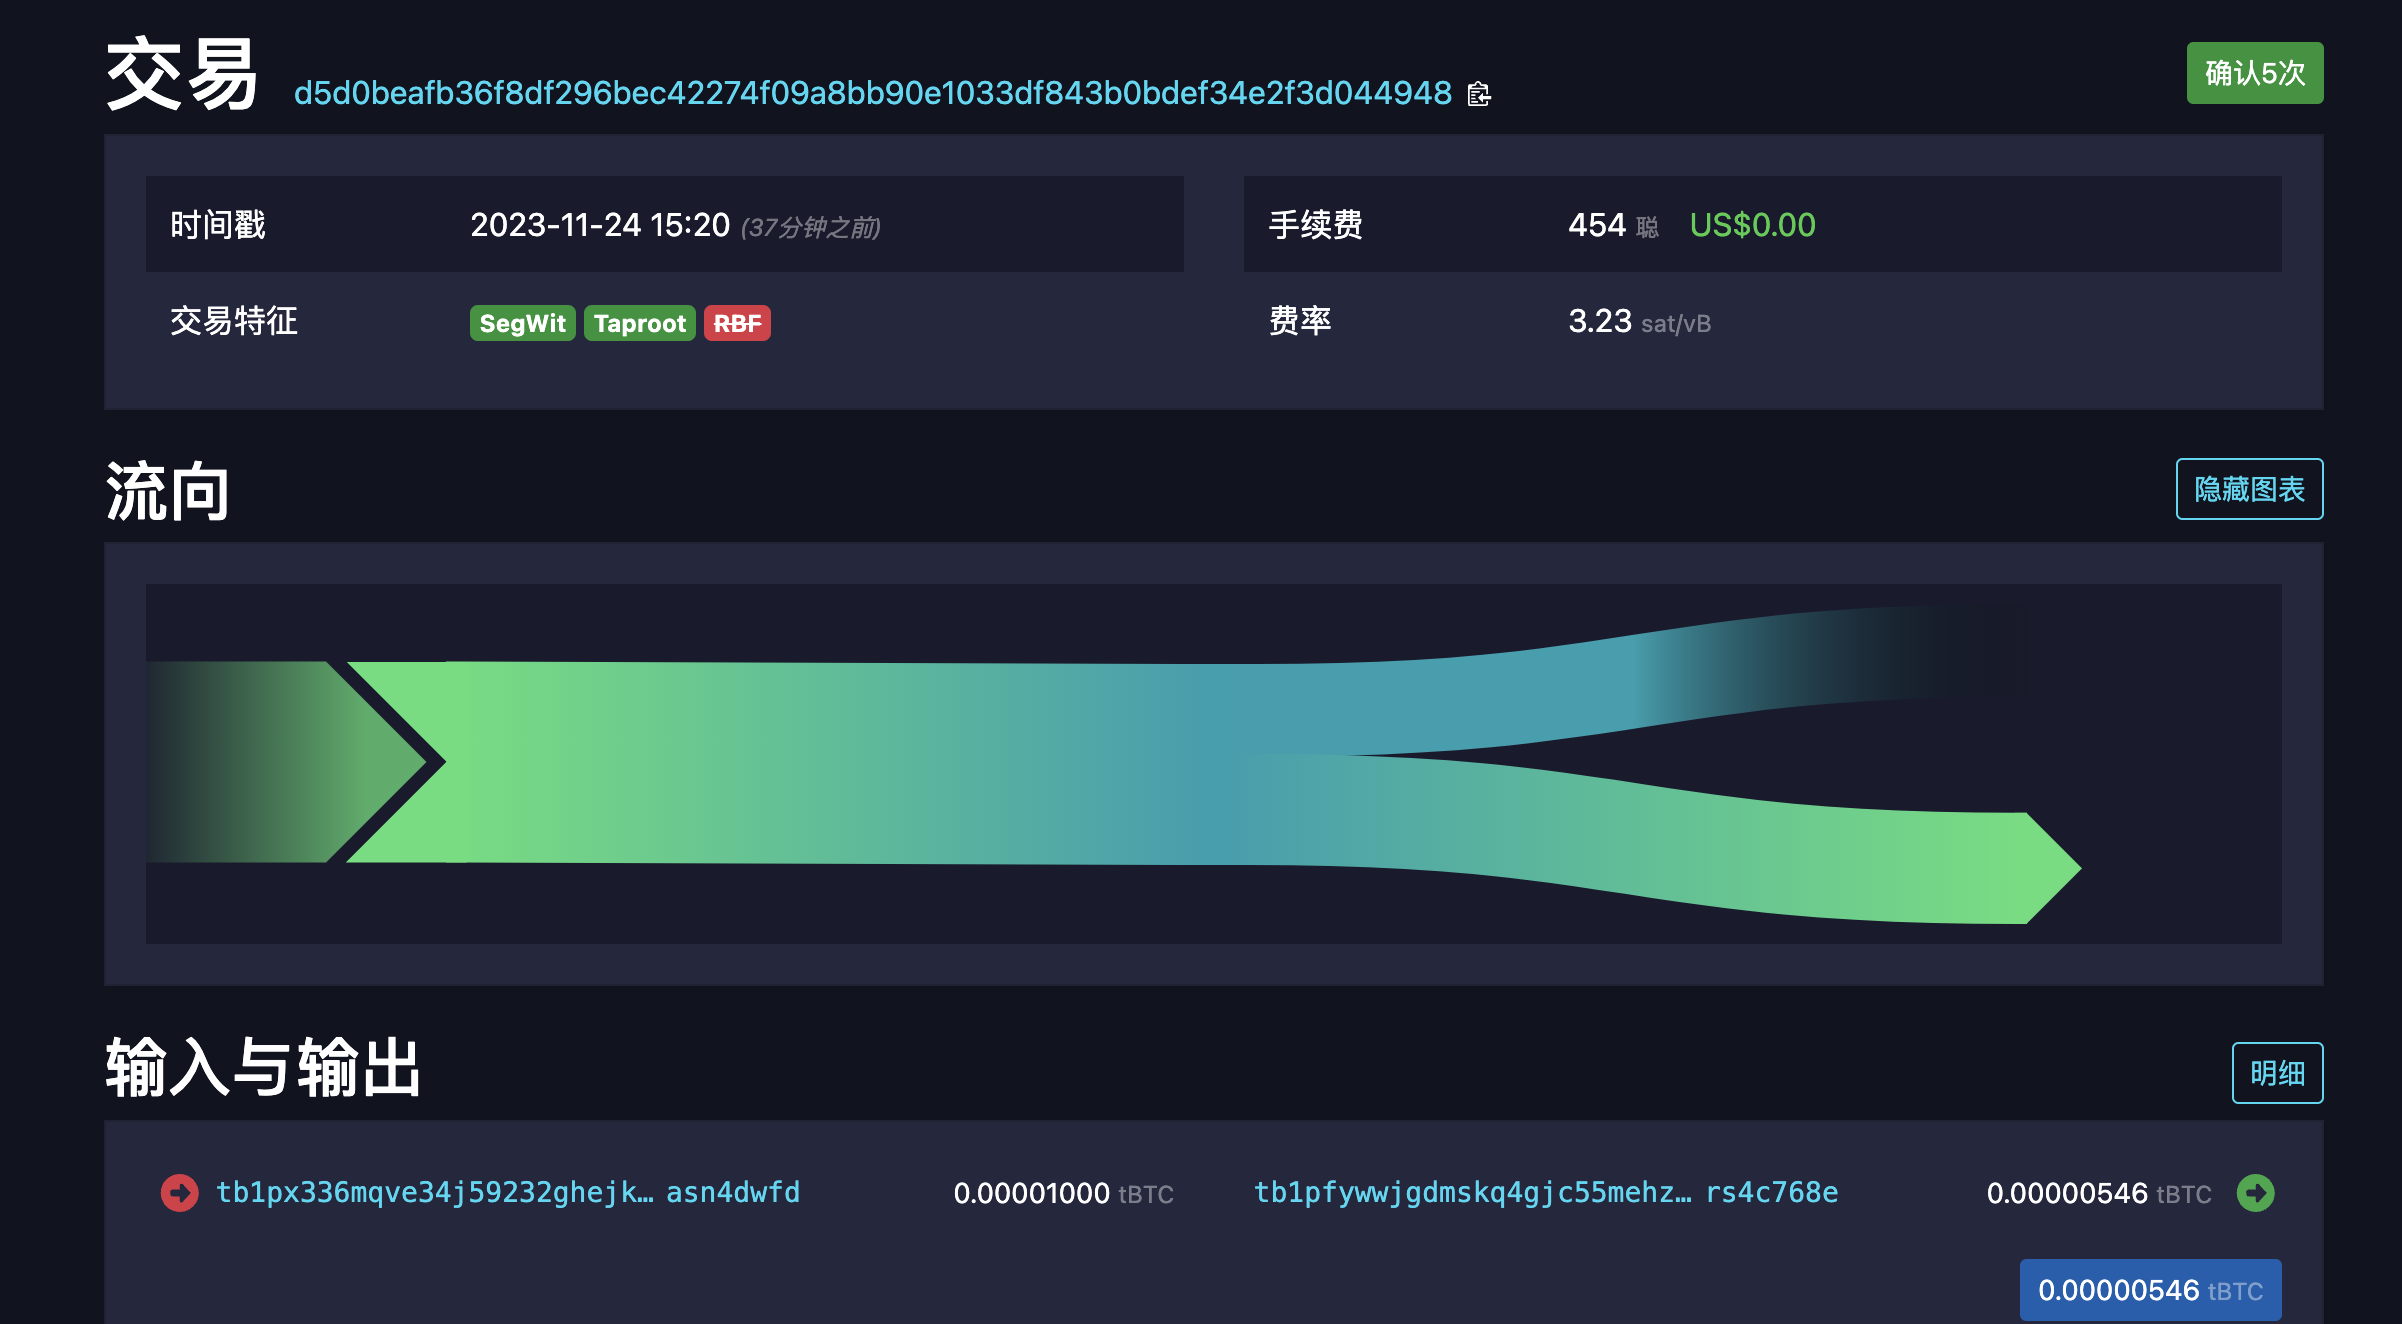

In [8]:
454 / 141

3.219858156028369